# Face Recognition Using PCA

After converting `.npy` files to `.csv` file here we will load this dataset and train a face recognition model using PCA

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
def show_original_images(pixels): # display original images
    
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                            subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()
    
    
def show_eigenfaces(pca): # displaying eigenfaces
    
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                            subplot_kw={'xticks':[], 'yticks':[]})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        
    plt.show()

## Read dataset and visualize it

In [3]:
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [4]:
df[:] = np.nan_to_num(df)

In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
df.astype(np.float64)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0.0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0.0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0.0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0.0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39.0
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39.0
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39.0
398,0.214876,0.219008,0.219008,0.223141,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39.0


In [7]:
df.isnull().any().sum()

0

In [8]:
targets = df['target']
pixels = df.drop(['target'], axis=1)
print(np.array(pixels).shape)

(400, 4096)


<IPython.core.display.Javascript object>


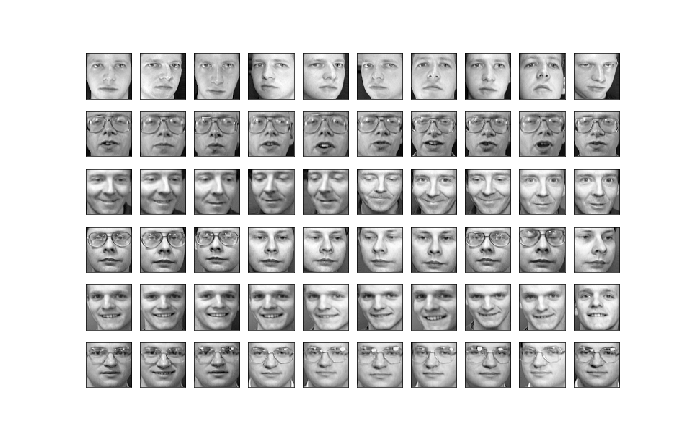

In [9]:
show_original_images(pixels)

## Split dataset into training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(pixels, targets)

## Perform PCA

<IPython.core.display.Javascript object>


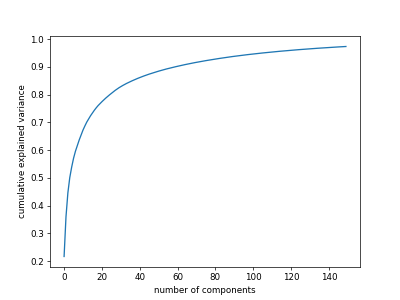

<IPython.core.display.Javascript object>


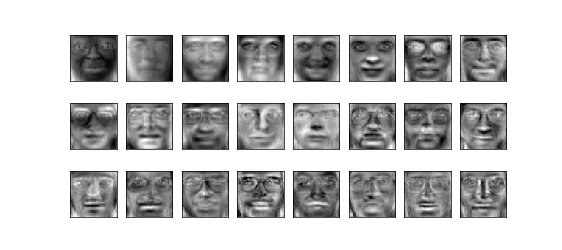

In [11]:
pca = PCA(n_components=150).fit(X_train)
plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

## Project Training data to PCA

In [12]:
print("Projecting the input data on the eigenfaces orthonormal basis")

Xtrain_pca = pca.transform(X_train)

Projecting the input data on the eigenfaces orthonormal basis


## Initialize Classifier and fit training data

In [13]:
clf = SVC(kernel='rbf', C=1000, gamma=0.001)

clf = clf.fit(Xtrain_pca, y_train)

## Perform testing and get classification report

In [14]:
print("Predicting people's names on the test set")
t0 = time()

Predicting people's names on the test set


In [15]:
Xtest_pca = pca.transform(X_test)

In [16]:
y_pred = clf.predict(Xtest_pca)

In [17]:
print("done in %0.3fs" % (time() - t0))

done in 0.253s


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      1.00      1.00         4
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         4
         6.0       0.50      1.00      0.67         2
         7.0       1.00      0.50      0.67         2
         8.0       1.00      1.00      1.00         1
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3
        11.0       1.00      1.00      1.00         1
        12.0       1.00      0.80      0.89         5
        13.0       1.00      1.00      1.00         3
        14.0       0.67      1.00      0.80         2
        15.0       1.00      1.00      1.00         1
        17.0       1.00      1.00      1.00         2
        18.0       1.00      1.00      1.00         1
        19.0       1.00    